# Car price prodiction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sbn
from sklearn.preprocessing import MinMaxScaler # veriler kac olursa olsun 1 ile 0 arasinda dogru oranlarla degistirir 
from sklearn.model_selection import train_test_split # test ve train verisini ayirmak icin kullanilir
from tensorflow.keras.models import Sequential # model olusturmak icin 
from tensorflow.keras.layers import Dense # model icine katman atar


In [4]:
dataFrame = pd.read_excel("merc.xlsx")
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [5]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [7]:
dataFrame.isnull().sum() # bos veri var mi kontrol

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

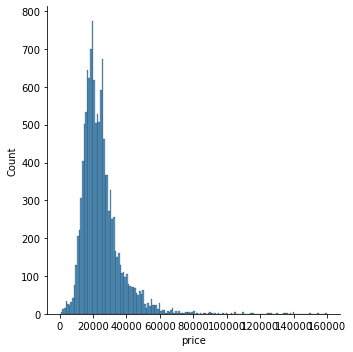

In [15]:
sbn.displot(dataFrame["price"]) # dagilim

In [21]:
dataFrame[dataFrame['price']>100000] # veriyi bozmasin diye veri setinden cikartacagiz

,year,price,transmission,mileage,tax,mpg,engineSize
5,2011,149948,Automatic,3000,570,21.4,6.2
8,2019,139948,Automatic,12000,145,21.4,4.0
1011,2019,104999,Semi-Auto,5822,150,22.6,4.0
1980,2019,109995,Semi-Auto,4688,150,31.7,4.0
2629,2019,123846,Semi-Auto,2951,145,22.1,4.0
2647,2019,125796,Automatic,637,145,24.8,4.0
3978,2019,102502,Semi-Auto,8691,150,11.0,3.0
4087,2019,104590,Automatic,3671,145,31.7,4.0
4094,2019,124366,Semi-Auto,880,145,24.8,4.0
4209,2018,104400,Semi-Auto,3796,145,31.7,4.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

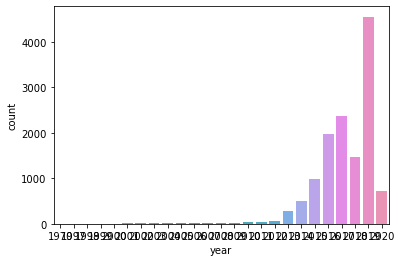

In [24]:
sbn.countplot(dataFrame['year'])

In [25]:
dataFrame.corr() # korelasyon

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [27]:
dataFrame.corr()["price"].sort_values() # korelasyon hesabi
"""
mileage: arabaylar gidilen mesafe ve ne kadar yuksekse o kadar ucuz olur araba 
year: uretim yilidir, ne kadar yeni o kadar pahali
tax: vergisi 'enginSize' ile iliskilidir 
"""

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64